# Session 1:Data Import and Cleaning Tasks

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Assessing the Data

In [2]:

try:
    with open('NSMES1988 - NSMES1988.csv', 'r') as nsmeFile:
        nsme_df = pd.read_csv(nsmeFile)
except Exception as e:
    print(f'Unexpected error: {e}')

nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


In [3]:
nsme_df.info(memory_usage='deep')

print(nsme_df.memory_usage(deep=True))

nsme_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  gender      4406 non-null   object 
 13  married     4406 non-null   object 
 14  school      4406 non-null   int64  
 15  income      4406 non-null   float64
 16  employed    4406 non-null   object 
 17  insurance   4406 non-null   object 
 18  medicaid    4406 non-null   object 
dtypes: float64(2), int64(9), ob

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,chronic,age,school,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,2203.500000,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,7.402406,10.290286,2.527132
std,1272.046972,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,0.633405,3.738736,2.924648
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.600000,0.000000,-1.012500
25%,1102.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.900000,8.000000,0.912150
50%,2203.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.300000,11.000000,1.698150
75%,3304.750000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.800000,12.000000,3.172850
max,4406.000000,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,10.900000,18.000000,54.835100


In [4]:
print(nsme_df['health'].unique())
print(nsme_df['adl'].unique())
print(nsme_df['region'].unique())
print(nsme_df['gender'].unique())
print(nsme_df['married'].unique())
print(nsme_df['employed'].unique())
print(nsme_df['insurance'].unique())
print(nsme_df['medicaid'].unique())

['average' 'poor' 'excellent']
['normal' 'limited']
['other' 'midwest' 'northeast' 'west']
['male' 'female']
['yes' 'no']
['yes' 'no']
['yes' 'no']
['no' 'yes']


## Initial thoughts

1. the first column looks like a mistake where it is pulling the index of the dataframe and inserted as an unnecessary column, they wanted to create a 1 index list
2. the first columns visits to novisits dont really make sense when you see the description of the columns. Need better clarification and naming.
3. why is the age column in the form of floats? were the numbers divided by 10? 
4. school needs to be named something different, looks like a hashed lookup
5. why is income in the form of a single digit float with precision of 6? was this meant to be the opposite? 6 numbers ahead of decimal? divided by 10k? also one of the min values is negative?

In [5]:
try:
    nsme_json = nsme_df.to_json('NSMES1988.json', orient='records', indent=4)
except Exception as e:
    print(f'Unexpected error occured: {e}')


In [6]:
nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


## Recommmendations

1. We need to remove the unnamed column and properly 1-index the data
2. Unnormalize age and income (multiply age by 10 and income by 10000)
3. One or more of the incomes is negative, this was not supposed to include expenses (if intentional) square all incomes and sqrt before adding back to unnormalize
4. We can turn all dtype int values that represent mostly visits into dtype uint16. To be unsigned and also non-negative integers that max out at 
65,535 which even if you visit every day that would take 179.5 years to reach max. This saves us from 8 bytes to 2bytes in memory. 
5. The object dtype from string as a default dtype that only requires 2 unique answers can be represented as a boolean and presented as its respective string pair when needed. objects take up significantly more memory, booleans take up 1byte. We can even use pd.NA for 'nulls'
6. Age can be represented also as a dtype uint16
7. Income can be downcasted to a float32, where the max is 3.402*10^38. More than enough for an income and still can represent the decimals if need be. I would mostly consider assigning dtype uint32 max of 2.1 billion for this as it is mostly irrelevant for decimal places in incomes. 

## Export data as new file

In [7]:
try:
    nsme_df.to_csv('NSMES1988new.csv', index=False)
except Exception as e:
    print(f'Unexpected error occured: {e}')
nsme_df

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


# Session 2: Data Processing and Statistical Analysis

## Import copy of Data

In [8]:
nsme_df__sess2_copy = pd.read_csv('NSMES1988new.csv')

nsme_df__sess2_copy.info(memory_usage='deep')
print(nsme_df__sess2_copy.describe())
nsme_df__sess2_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4406 non-null   int64  
 1   visits      4406 non-null   int64  
 2   nvisits     4406 non-null   int64  
 3   ovisits     4406 non-null   int64  
 4   novisits    4406 non-null   int64  
 5   emergency   4406 non-null   int64  
 6   hospital    4406 non-null   int64  
 7   health      4406 non-null   object 
 8   chronic     4406 non-null   int64  
 9   adl         4406 non-null   object 
 10  region      4406 non-null   object 
 11  age         4406 non-null   float64
 12  gender      4406 non-null   object 
 13  married     4406 non-null   object 
 14  school      4406 non-null   int64  
 15  income      4406 non-null   float64
 16  employed    4406 non-null   object 
 17  insurance   4406 non-null   object 
 18  medicaid    4406 non-null   object 
dtypes: float64(2), int64(9), ob

,Unnamed: 0,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
0,1,5,0,0,0,0,1,average,2,normal,other,6.9,male,yes,6,2.881000,yes,yes,no
1,2,1,0,2,0,2,0,average,2,normal,other,7.4,female,yes,10,2.747800,no,yes,no
2,3,13,0,0,0,3,3,poor,4,limited,other,6.6,female,no,10,0.653200,no,no,yes
3,4,16,0,5,0,1,1,poor,2,limited,other,7.6,male,yes,3,0.658800,no,yes,no
4,5,3,0,0,0,0,0,average,2,limited,other,7.9,female,yes,6,0.658800,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,4402,11,0,0,0,0,0,average,0,normal,other,8.4,female,yes,8,2.249700,no,yes,no
4402,4403,12,0,0,0,0,0,average,2,normal,other,7.8,female,no,11,5.813200,no,yes,no
4403,4404,10,0,20,0,1,1,average,5,normal,other,7.3,male,yes,12,3.877916,no,yes,no
4404,4405,16,1,0,0,0,0,average,0,normal,other,6.6,female,yes,12,3.877916,no,yes,no


## Applying Recommendations

### Manipulate the data

In [ ]:
#Drop the unnamed columns that were indexes mistakenly put into the data. Create a variable to play around with
nsme_df__sess2_copy.drop(['Unnamed: 0'], axis=1, inplace=True)

#Just for user visualization adjusted index to be 1 indexed
nsme_df__sess2_copy.index += 1

 #Multiply and assign the age by 10 to unnormalize the data. Understand it's still a float!
nsme_df__sess2_copy['age'] *= 10

#Multiply and assign income by 10000 to unnormalize the data. There was a negative so abs it first
nsme_df__sess2_copy['income'] = abs(nsme_df__sess2_copy['income'])
nsme_df__sess2_copy['income'] *= 10000

nsme_df__sess2_copy

,visits,nvisits,ovisits,novisits,emergency,hospital,health,chronic,adl,region,age,gender,married,school,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,normal,other,69.0,male,yes,6,28810.00,yes,yes,no
2,1,0,2,0,2,0,average,2,normal,other,74.0,female,yes,10,27478.00,no,yes,no
3,13,0,0,0,3,3,poor,4,limited,other,66.0,female,no,10,6532.00,no,no,yes
4,16,0,5,0,1,1,poor,2,limited,other,76.0,male,yes,3,6588.00,no,yes,no
5,3,0,0,0,0,0,average,2,limited,other,79.0,female,yes,6,6588.00,no,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,normal,other,84.0,female,yes,8,22497.00,no,yes,no
4403,12,0,0,0,0,0,average,2,normal,other,78.0,female,no,11,58132.00,no,yes,no
4404,10,0,20,0,1,1,average,5,normal,other,73.0,male,yes,12,38779.16,no,yes,no
4405,16,1,0,0,0,0,average,0,normal,other,66.0,female,yes,12,38779.16,no,yes,no


### Default Int to uint16 conversions

In [10]:
#Gather and convert all int dtypes into uint16 as per recommended to see the memory size difference
nsme_df__sess2_copy = nsme_df__sess2_copy.astype({
    'visits': np.uint16, 
    'nvisits': np.uint16,
    'ovisits': np.uint16,
    'novisits': np.uint16,
    'emergency': np.uint16,
    'hospital': np.uint16,
    'chronic': np.uint16,
    'school': np.uint16,
    'age': np.uint16
})

print(nsme_df__sess2_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   uint16 
 1   nvisits    4406 non-null   uint16 
 2   ovisits    4406 non-null   uint16 
 3   novisits   4406 non-null   uint16 
 4   emergency  4406 non-null   uint16 
 5   hospital   4406 non-null   uint16 
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   uint16 
 8   adl        4406 non-null   object 
 9   region     4406 non-null   object 
 10  age        4406 non-null   uint16 
 11  gender     4406 non-null   object 
 12  married    4406 non-null   object 
 13  school     4406 non-null   uint16 
 14  income     4406 non-null   float64
 15  employed   4406 non-null   object 
 16  insurance  4406 non-null   object 
 17  medicaid   4406 non-null   object 
dtypes: float64(1), object(8), uint16(9)
memory usage: 1.9 MB
None


### Default string object to bool conversions

In [11]:
#Gather and convert all string types with only 2 string variations into bools and convert them later for printing
# Can't convert like we would the others, they have to be mapped, or else astype bool always returns true for non empty string 

nsme_df__sess2_copy['adl'] = nsme_df__sess2_copy['adl'].map({'limited': True, 'normal': False})
nsme_df__sess2_copy['gender'] = nsme_df__sess2_copy['gender'].map({'male': True, 'female': False})    #note it is male based, so True = male
nsme_df__sess2_copy['married'] = nsme_df__sess2_copy['married'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['employed'] = nsme_df__sess2_copy['employed'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['insurance'] = nsme_df__sess2_copy['insurance'].map({'yes': True, 'no': False})
nsme_df__sess2_copy['medicaid'] = nsme_df__sess2_copy['medicaid'].map({'yes': True, 'no': False})


# Print string outcomes from object columns for reference
print(nsme_df['health'].unique())
print(nsme_df['adl'].unique())
print(nsme_df['region'].unique())
print(nsme_df['gender'].unique())
print(nsme_df['married'].unique())
print(nsme_df['employed'].unique())
print(nsme_df['insurance'].unique())
print(nsme_df['medicaid'].unique())
print(nsme_df__sess2_copy.info(memory_usage='deep'))

['average' 'poor' 'excellent']
['normal' 'limited']
['other' 'midwest' 'northeast' 'west']
['male' 'female']
['yes' 'no']
['yes' 'no']
['yes' 'no']
['no' 'yes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   visits     4406 non-null   uint16 
 1   nvisits    4406 non-null   uint16 
 2   ovisits    4406 non-null   uint16 
 3   novisits   4406 non-null   uint16 
 4   emergency  4406 non-null   uint16 
 5   hospital   4406 non-null   uint16 
 6   health     4406 non-null   object 
 7   chronic    4406 non-null   uint16 
 8   adl        4406 non-null   bool   
 9   region     4406 non-null   object 
 10  age        4406 non-null   uint16 
 11  gender     4406 non-null   bool   
 12  married    4406 non-null   bool   
 13  school     4406 non-null   uint16 
 14  income     4406 non-null   float64
 15  employed   4406 non-null   bool   
 16  insuran

### Income column to uint32 conversion

In [12]:
# Convert Income into a uint32 as how I dont think salaries need a decimal place in MOST cases
# The max of uint32 is 4,294,967,295 or 2^32 -1 which should suffice for almost everyone
nsme_df__sess2_copy = nsme_df__sess2_copy.astype({
    'income': np.uint32
})

print(nsme_df__sess2_copy.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   visits     4406 non-null   uint16
 1   nvisits    4406 non-null   uint16
 2   ovisits    4406 non-null   uint16
 3   novisits   4406 non-null   uint16
 4   emergency  4406 non-null   uint16
 5   hospital   4406 non-null   uint16
 6   health     4406 non-null   object
 7   chronic    4406 non-null   uint16
 8   adl        4406 non-null   bool  
 9   region     4406 non-null   object
 10  age        4406 non-null   uint16
 11  gender     4406 non-null   bool  
 12  married    4406 non-null   bool  
 13  school     4406 non-null   uint16
 14  income     4406 non-null   uint32
 15  employed   4406 non-null   bool  
 16  insurance  4406 non-null   bool  
 17  medicaid   4406 non-null   bool  
dtypes: bool(6), object(2), uint16(9), uint32(1)
memory usage: 597.7 KB
None


### Column Name changes

In [13]:
# Change the names of columns it gives better clarity of what this is, just 'school' is not intuitive enough without the data page
nsme_df__sess2_copy.rename(columns = {'school': 'yearsofedu'}, inplace=True)
nsme_df__sess2_copy.rename(columns = {'adl': 'actionlimited'}, inplace=True)
nsme_df__sess2_copy.rename(columns = {'hospital': 'hospitalstays'}, inplace=True)

nsme_df__sess2_copy

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4403,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4404,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4405,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


## Assess new manipulated data

### Data numbers

In [14]:
print(nsme_df__sess2_copy.info(memory_usage='deep'))
nsme_df__sess2_copy.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,chronic,age,yearsofedu,income
count,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000,4406.000000
mean,5.774399,1.618021,0.750794,0.536087,0.263504,0.295960,1.541988,74.024058,10.290286,25284.144122
std,6.759225,5.317056,3.652759,3.879506,0.703659,0.746398,1.349632,6.334050,3.738736,29235.322071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,69.000000,8.000000,9128.750000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,73.000000,11.000000,16981.500000
75%,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,78.000000,12.000000,31728.500000
max,89.000000,104.000000,141.000000,155.000000,12.000000,8.000000,8.000000,109.000000,18.000000,548351.000000


In [15]:
print(nsme_df__sess2_copy.isnull().sum())      #check for nulls or empty data
nsme_df__sess2_copy.head(20)


visits           0
nvisits          0
ovisits          0
novisits         0
emergency        0
hospitalstays    0
health           0
chronic          0
actionlimited    0
region           0
age              0
gender           0
married          0
yearsofedu       0
income           0
employed         0
insurance        0
medicaid         0
dtype: int64


,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
6,17,0,0,0,0,0,poor,5,True,other,66,False,False,7,3301,False,False,True
7,9,0,0,0,0,0,average,0,False,midwest,75,False,False,8,8280,False,True,False
8,3,0,0,0,0,0,average,0,False,midwest,87,False,False,8,30456,False,True,False
9,1,0,0,0,0,0,average,0,False,midwest,73,False,False,8,30456,False,True,False
10,0,0,0,0,0,0,average,0,False,midwest,78,False,False,8,30456,False,True,False


### Data Graphs

1. First observation was the clear indication of less memory usage from 2.2 MB to 597.7 KB
2. The describe on visits is a bit weird, the mean is around 5 but the max is 85, someone is visiting a LOT more
3. Income is a bit off, but not suspicious, someone has 0 income and someone has an insanely large income

#### Assessing Visits 

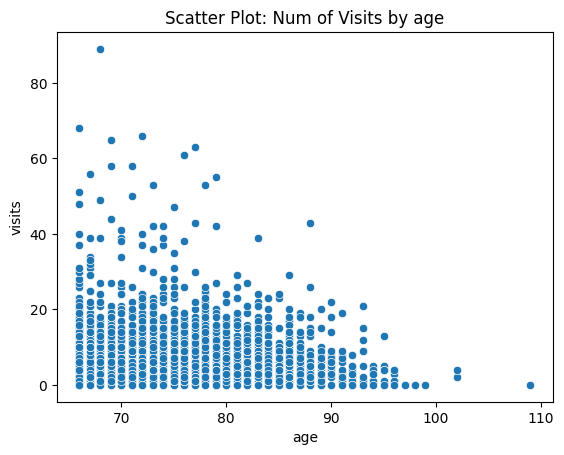

In [16]:
#Visualize visits as it looks a bit off, i'll compare it to age since that should be a good correlation
sns.scatterplot(x='age', y='visits', data=nsme_df__sess2_copy)

plt.title('Scatter Plot: Num of Visits by age')

plt.show()

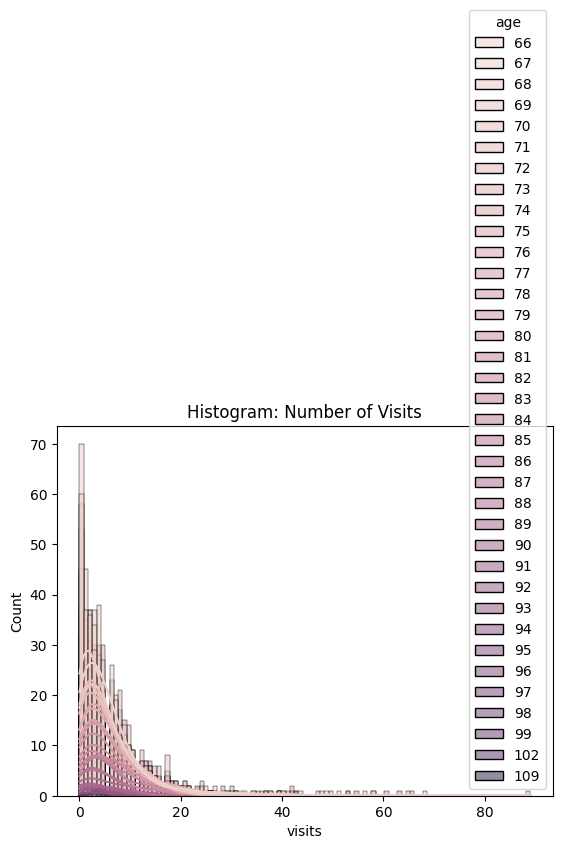

In [17]:
#Scatterplot doesnt look the best, but gave a good visual of outliers! Let's try histogram
sns.histplot(data=nsme_df__sess2_copy, x='visits', kde=True, hue='age')

plt.title('Histogram: Number of Visits')

plt.show()


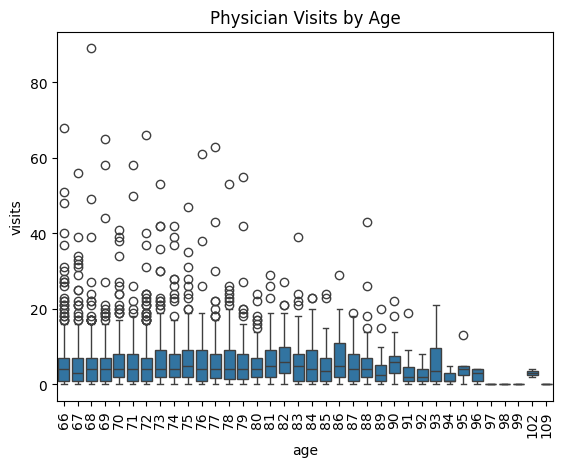

In [18]:
# Histogram enforced what we observed, we knew the visits averaged the lower side, few outliers on high end
# Box plot example could help more for average clusters
sns.boxplot(x='age', y='visits', data=nsme_df__sess2_copy)

plt.title('Physician Visits by Age')
plt.xticks(rotation=90)

plt.show()

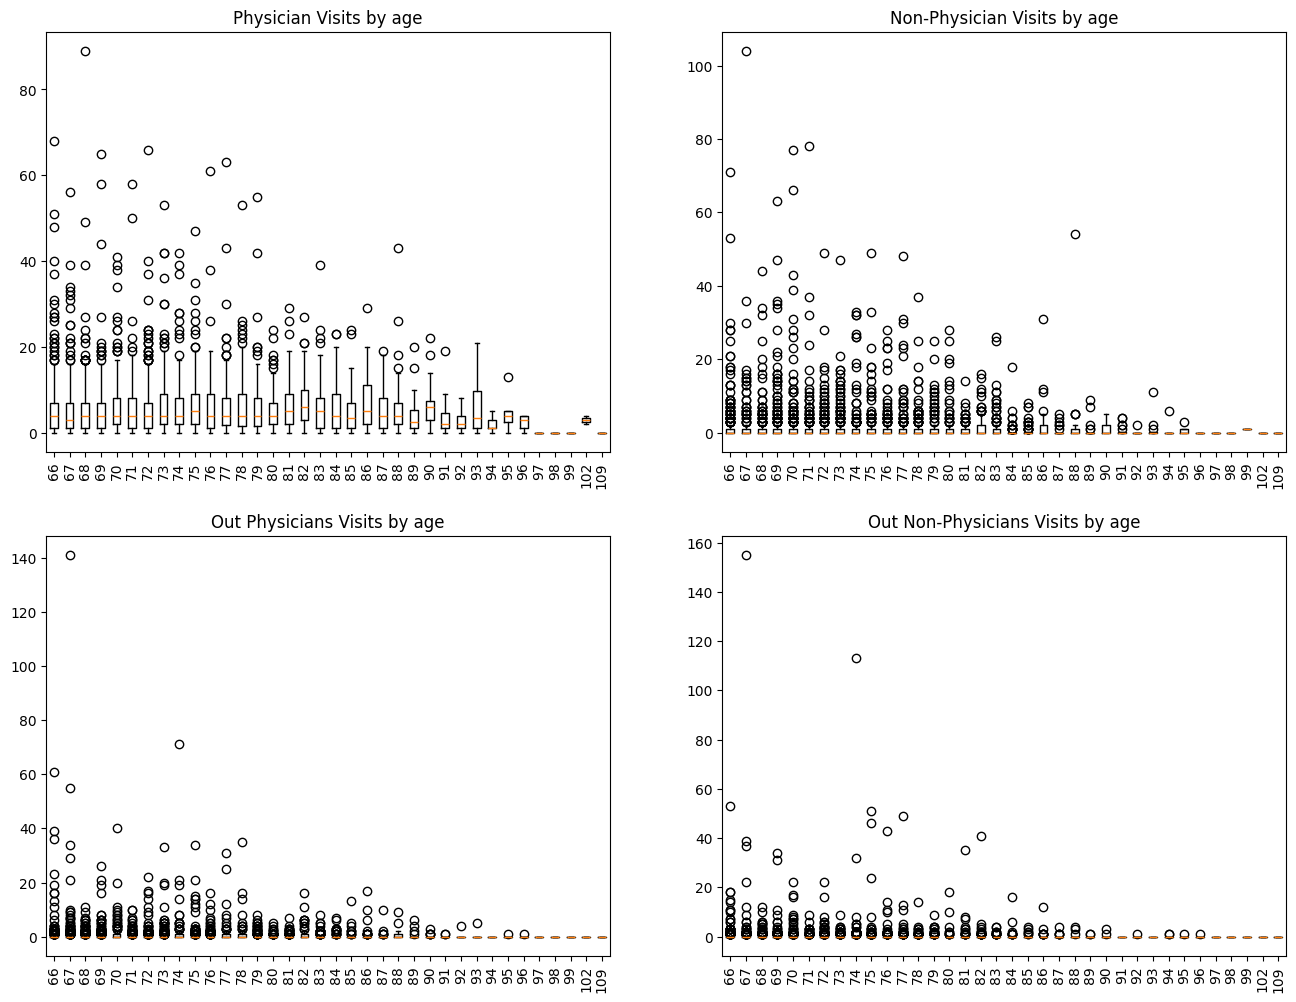

In [19]:
#I like the look of box plots the most in visits data representation vs age, lets add other visit data sets to visualize side-by-side
visits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['visits']
nvisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['nvisits']
ovisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['ovisits']
novisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['novisits']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].boxplot([v for _,v in visits_by_age], tick_labels=visits_by_age.groups.keys())
axs[0, 1].boxplot([v for _,v in nvisits_by_age], tick_labels=nvisits_by_age.groups.keys())
axs[1, 0].boxplot([v for _,v in ovisits_by_age], tick_labels=ovisits_by_age.groups.keys())
axs[1, 1].boxplot([v for _,v in novisits_by_age], tick_labels=novisits_by_age.groups.keys())

axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 1].tick_params(axis='x', rotation=90)

axs[0, 0].set_title('Physician Visits by age')
axs[0, 1].set_title('Non-Physician Visits by age')
axs[1, 0].set_title('Out Physicians Visits by age')
axs[1, 1].set_title('Out Non-Physicians Visits by age')

plt.show()

There's clearly a disparity and several outliers that are skewing the visits based on some ages (mainly 67), further information needs to be revealed on why these patients are having a large amount of visits

#### Assessing Income

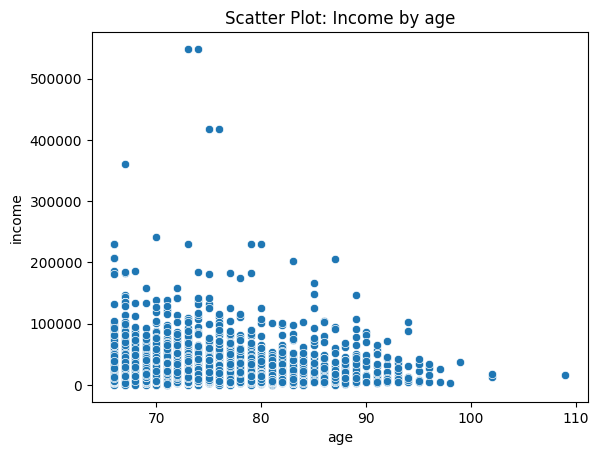

In [20]:
#Visualize income as it looks a bit off, i'll compare it to age since that should be a good correlation
sns.scatterplot(x='age', y='income', data=nsme_df__sess2_copy)

plt.title('Scatter Plot: Income by age')

plt.show()

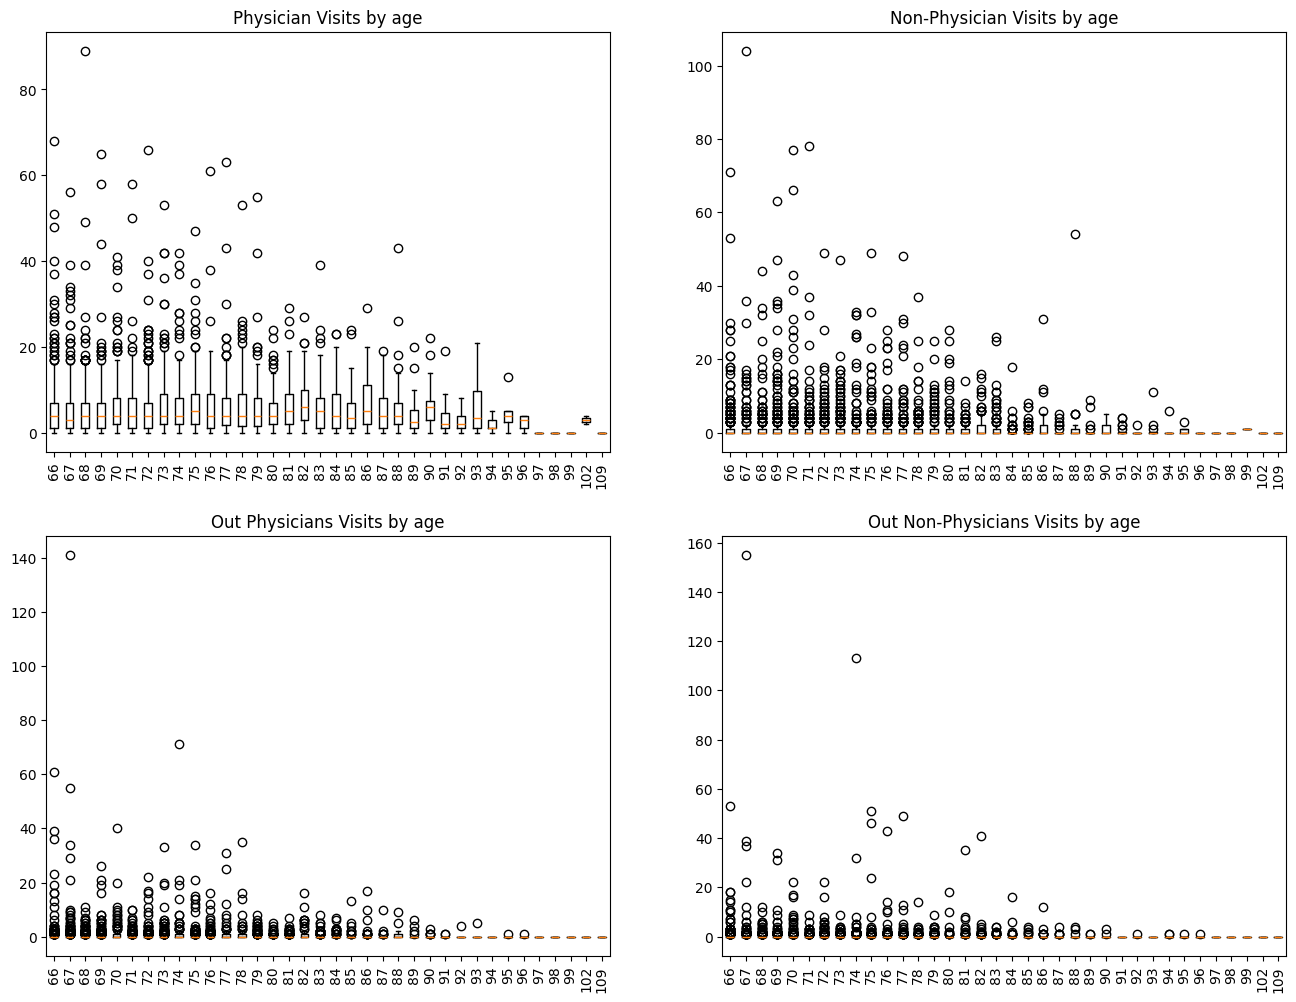

In [21]:
#I like the look of box plots the most in visits data representation vs age, lets add other visit data sets to visualize side-by-side
visits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['visits']
nvisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['nvisits']
ovisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['ovisits']
novisits_by_age = nsme_df__sess2_copy.groupby(nsme_df__sess2_copy['age'])['novisits']

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

axs[0, 0].boxplot([v for _,v in visits_by_age], tick_labels=visits_by_age.groups.keys())
axs[0, 1].boxplot([v for _,v in nvisits_by_age], tick_labels=nvisits_by_age.groups.keys())
axs[1, 0].boxplot([v for _,v in ovisits_by_age], tick_labels=ovisits_by_age.groups.keys())
axs[1, 1].boxplot([v for _,v in novisits_by_age], tick_labels=novisits_by_age.groups.keys())

axs[0, 0].tick_params(axis='x', rotation=90)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[1, 0].tick_params(axis='x', rotation=90)
axs[1, 1].tick_params(axis='x', rotation=90)

axs[0, 0].set_title('Physician Visits by age')
axs[0, 1].set_title('Non-Physician Visits by age')
axs[1, 0].set_title('Out Physicians Visits by age')
axs[1, 1].set_title('Out Non-Physicians Visits by age')

plt.show()

In [30]:
nsme_df__sess2_copy.to_csv('NSMES1988updated.csv', index=False)
nsme_df__sess2_copy.info(memory_usage='deep')
nsme_df__sess2_copy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 1 to 4406
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
1,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
2,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
3,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
4,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
5,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4403,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4404,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4405,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


# Session 3: Data Analysis with Pandas

## Identifying Types of Variables

### Importing updated CSV file

In [96]:
import pandas as pd

dtypes = ({
    'visits': np.uint16, 
    'nvisits': np.uint16,
    'ovisits': np.uint16,
    'novisits': np.uint16,
    'emergency': np.uint16,
    'hospitalstays': np.uint16,
    'chronic': np.uint16,
    'yearsofedu': np.uint16,
    'age': np.uint16,
    'income': np.uint32,
    'adl': np.bool,
    'gender': np.bool,
    'married': np.bool,
    'employed': np.bool,
    'insurance': np.bool,
    'medicaid': np.bool,
})

session_3_data = pd.read_csv('NSMES1988updated.csv', dtype=dtypes)
session_3_data.info(memory_usage='deep')
print(session_3_data.describe())
session_3_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4406 entries, 0 to 4405
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   visits         4406 non-null   uint16
 1   nvisits        4406 non-null   uint16
 2   ovisits        4406 non-null   uint16
 3   novisits       4406 non-null   uint16
 4   emergency      4406 non-null   uint16
 5   hospitalstays  4406 non-null   uint16
 6   health         4406 non-null   object
 7   chronic        4406 non-null   uint16
 8   actionlimited  4406 non-null   bool  
 9   region         4406 non-null   object
 10  age            4406 non-null   uint16
 11  gender         4406 non-null   bool  
 12  married        4406 non-null   bool  
 13  yearsofedu     4406 non-null   uint16
 14  income         4406 non-null   uint32
 15  employed       4406 non-null   bool  
 16  insurance      4406 non-null   bool  
 17  medicaid       4406 non-null   bool  
dtypes: bool(6), object(2), uint1

,visits,nvisits,ovisits,novisits,emergency,hospitalstays,health,chronic,actionlimited,region,age,gender,married,yearsofedu,income,employed,insurance,medicaid
0,5,0,0,0,0,1,average,2,False,other,69,True,True,6,28809,True,True,False
1,1,0,2,0,2,0,average,2,False,other,74,False,True,10,27477,False,True,False
2,13,0,0,0,3,3,poor,4,True,other,66,False,False,10,6532,False,False,True
3,16,0,5,0,1,1,poor,2,True,other,76,True,True,3,6588,False,True,False
4,3,0,0,0,0,0,average,2,True,other,79,False,True,6,6588,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4401,11,0,0,0,0,0,average,0,False,other,84,False,True,8,22496,False,True,False
4402,12,0,0,0,0,0,average,2,False,other,78,False,False,11,58132,False,True,False
4403,10,0,20,0,1,1,average,5,False,other,73,True,True,12,38779,False,True,False
4404,16,1,0,0,0,0,average,0,False,other,66,False,True,12,38779,False,True,False


### Identifying Types of Variables

#### Numerical 

In the data the columns below can be assumed as numerical:

Visits,
nVisits,
oVisits,
noVisits,
emergency,
hospitalstays,
chronic,
age,
yearsofedu,
Income,

All these columns are numbers that can be used in math for instance, it can be measured and quantified for whatever the reason may be.

#### Categorical

In the data the columns below can be assumed as categorical:

health,
actionlimited,
region,
gender,
married,
employed,
insurance,
medicaid,

All these columns are labels, groups, or just regular categories, that can be used to identify the data as something.

#### Continuous

In the data the columns below can be assumed as continuous:

income

All these columns represent an infinite range of numbers even if it starts at 0 it can be decimals and have infinite value in it's range.

#### Discrete

In the data the columns below can be assumed as discrete:

Visits,
nVisits,
oVisits,
noVisits,
emergency,
hospitalstays,
chronic,
age,
yearsofedu,

All these columns are specific value counts, they can't be split by values in between, either counted or not.

#### Nominal

In the data the columns below can be assumed as nominal:

actionlimited,
region,
gender,
married,
employed,
insurance,
medicaid,

All these columns have no order or ranking, they just exist as an unordered label that can change at any time regardless of the previous outcome.

#### Ordinal

In the data the columns below can be assumed as ordinal:

health

All these columns have an order or ranking, they tell you how meaningful something is based on the previous outcome i.e. poor to excellent indicates better health.

#### Data type Conclusion

1. My first mistake was handling writing to CSV's they cannot keep my manipulated Dtypes from previous manipulations so i have to suggest what they are every time. I can do this in the form of another file using to_parquet() and read_parquet(), or infer it directly in the notebook. 
2. Continuous and Discrete are types of numerical data 
3. Nominal and Ordinal are types of categorical data
4. This helps us to understand how this data should look when either observing or manipulating it and helps out expected outcomes when using it.

## Analyzing Data

### Imports

In [75]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

### Statistical Analysis Graphs

#### Discrete Numerical

count    4406.000000
mean        5.774399
std         6.759225
min         0.000000
25%         1.000000
50%         4.000000
75%         8.000000
max        89.000000
Name: visits, dtype: float64
count    4406.000000
mean        1.618021
std         5.317056
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       104.000000
Name: nvisits, dtype: float64
count    4406.000000
mean        0.750794
std         3.652759
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       141.000000
Name: ovisits, dtype: float64
count    4406.000000
mean        0.536087
std         3.879506
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       155.000000
Name: novisits, dtype: float64
count    4406.000000
mean       10.290286
std         3.738736
min         0.000000
25%         8.000000
50%        11.000000
75%        12.000000
max        18.000000
Name: yearsofedu, dtype: float64
Visits 

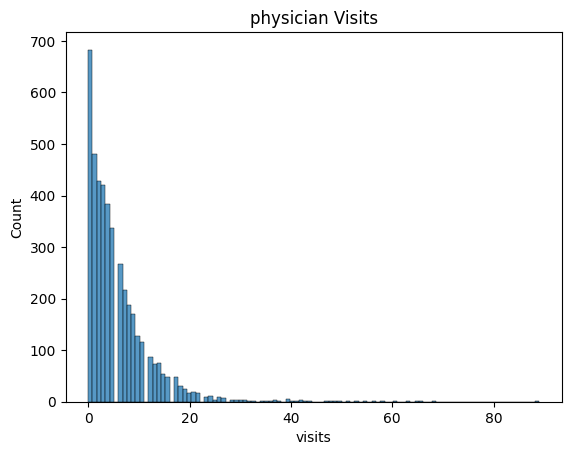

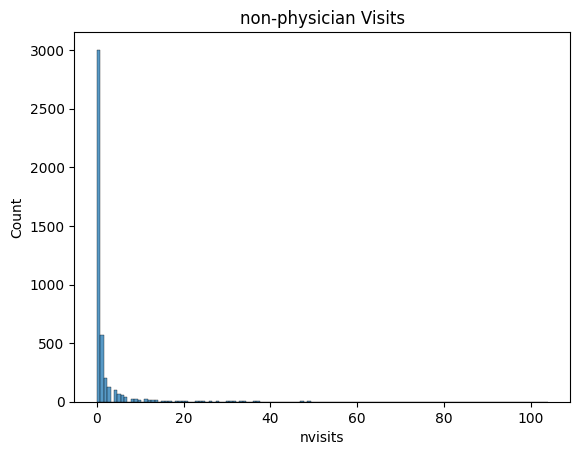

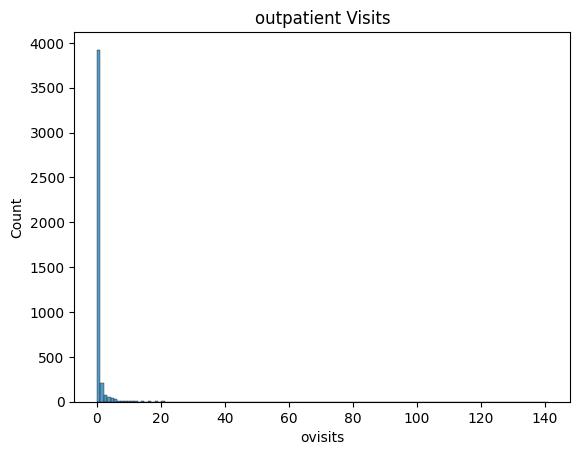

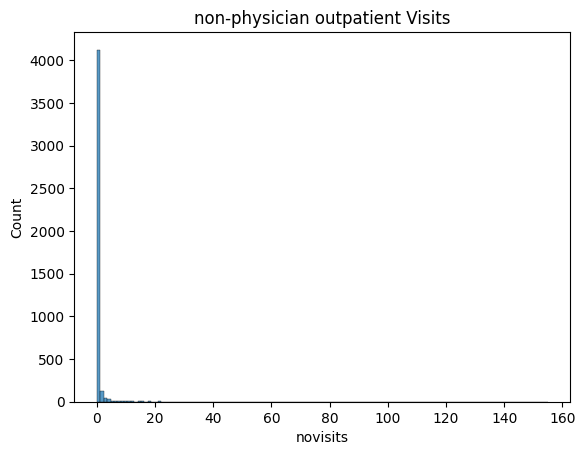

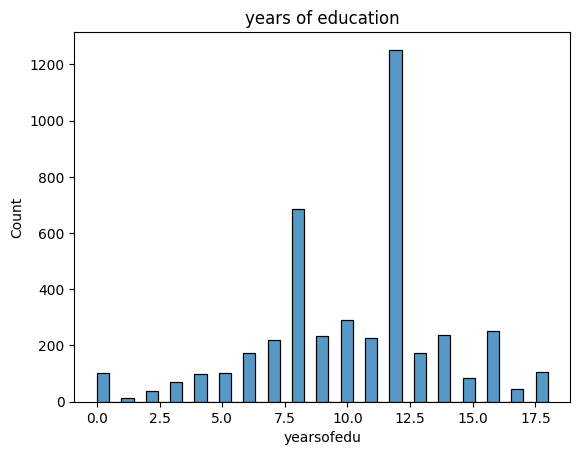

In [101]:
print(session_3_data['visits'].describe())
print(session_3_data['nvisits'].describe())
print(session_3_data['ovisits'].describe())
print(session_3_data['novisits'].describe())
print(session_3_data['yearsofedu'].describe())

sns.histplot(session_3_data['visits'])
print(f'Visits Mode: {session_3_data['visits'].mode()}')
plt.title('physician Visits')
plt.show()
sns.histplot(session_3_data['nvisits'])
plt.title('non-physician Visits')
plt.show()
sns.histplot(session_3_data['ovisits'])
plt.title('outpatient Visits')
plt.show()
sns.histplot(session_3_data['novisits'])
plt.title('non-physician outpatient Visits')
plt.show()
sns.histplot(session_3_data['yearsofedu'])
plt.title('years of education')
plt.show()

In these discrete numerical columns:

1. all visits columns show a shape of heavily skewed right and their counts of how many visits has a mean of 5 or less generally low counts. There are some heavy outliers on the tail. the Central Tendency would lean heavy towards being less than 5 visits or so.
2. years of education shows a normal bell curve shape with the central tendency around 10 or 11. 

#### Nominal Categorical 

gender
False    0.596459
True     0.403541
Name: proportion, dtype: float64
married
True     0.546074
False    0.453926
Name: proportion, dtype: float64
employed
False    0.896732
True     0.103268
Name: proportion, dtype: float64
insurance
True     0.776441
False    0.223559
Name: proportion, dtype: float64
medicaid
False    0.908761
True     0.091239
Name: proportion, dtype: float64


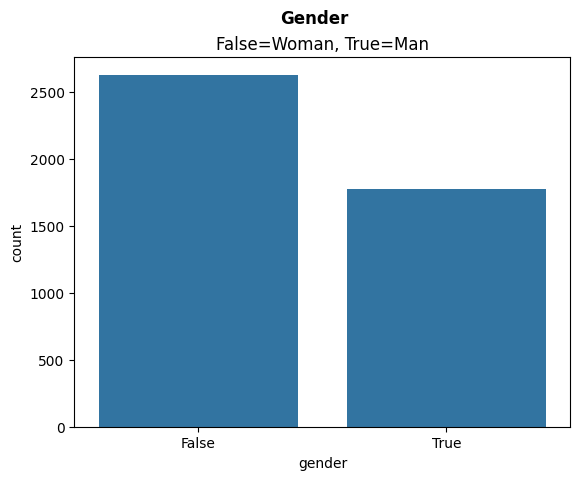

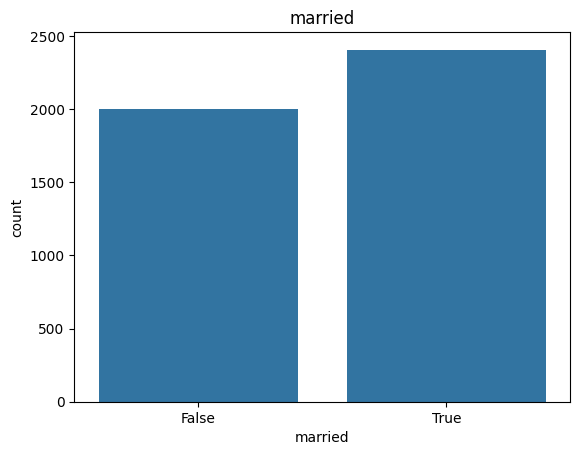

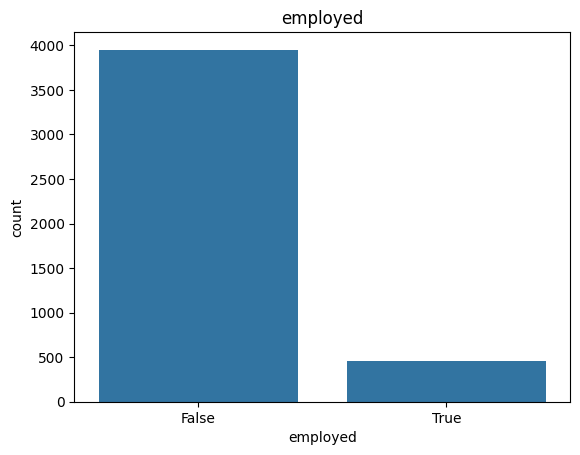

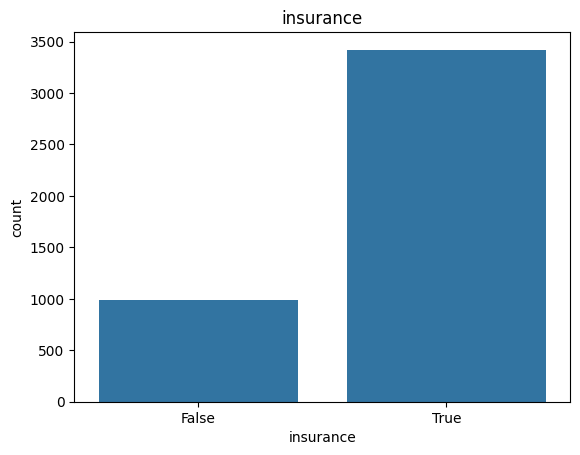

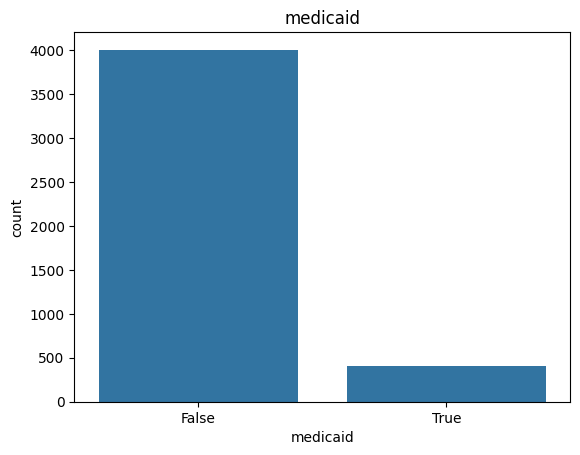

In [ ]:
print(session_3_data['gender'].value_counts(normalize=True))
print(session_3_data['married'].value_counts(normalize=True))
print(session_3_data['employed'].value_counts(normalize=True))
print(session_3_data['insurance'].value_counts(normalize=True))
print(session_3_data['medicaid'].value_counts(normalize=True))

sns.countplot(x='gender', data=session_3_data)
plt.title('False=Woman, True=Man')
plt.suptitle('Gender', fontweight='bold')
plt.show()
sns.countplot(x='married', data=session_3_data)
plt.title('married')
plt.show()
sns.countplot(x='employed', data=session_3_data)
plt.title('employed')
plt.show()
sns.countplot(x='insurance', data=session_3_data)
plt.title('insurance')
plt.show()
sns.countplot(x='medicaid', data=session_3_data)
plt.title('medicaid')
plt.show()

In these categorical data types:

1. gender shape is fairly close making it more of a normal bell curve with the central tendency skewed a bit to women
2. married shape is also fairly close with a normal bell curve with the central tendency skewed towards married
3. employed is heavily skewed towards false with the central on false aws well
4. insurance is heavily skewed true
5. medicaid is heavily skewed false 

#### Continuous Numerical 

count      4406.000000
mean      25284.144122
std       29235.322071
min           0.000000
25%        9128.750000
50%       16981.500000
75%       31728.500000
max      548351.000000
Name: income, dtype: float64
Mode: 0    4320
Name: income, dtype: uint32
Median: 16981.5


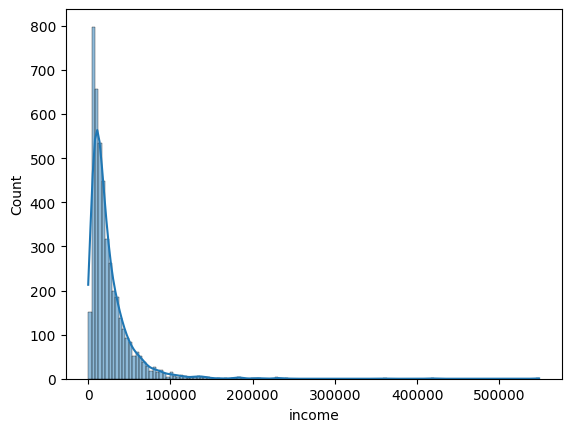

In [ ]:
print(session_3_data['income'].describe())
print(f'Mode: {session_3_data['income'].mode()}')
print(f'Median: {session_3_data['income'].median()}')

sns.histplot(session_3_data['income'], kde=True)
plt.show()

For income it's shape is a right skewed continuos numerical shape with heavy tails on the right. The central tendency with a mode of 0 and 4320 but a mean of 25284 and median of 16981 shows me that the income will normalize or center around 20k maybe a bit more towards 23k. 

#### Data Relations

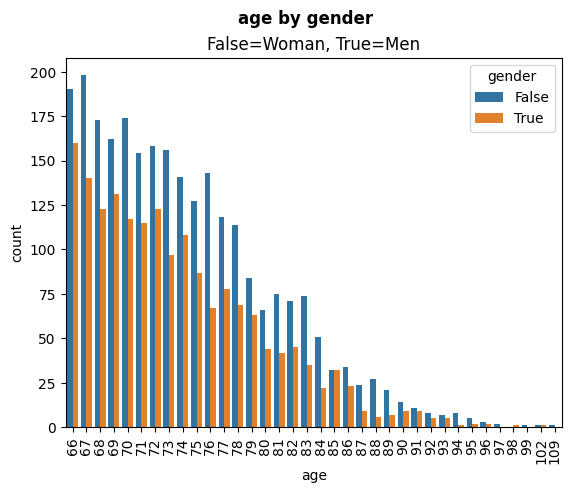

In [132]:
sns.countplot(x='age', data=session_3_data, hue='gender')
plt.title('False=Woman, True=Men')
plt.suptitle('age by gender', fontweight='bold')
plt.xticks(rotation=90)
plt.show()


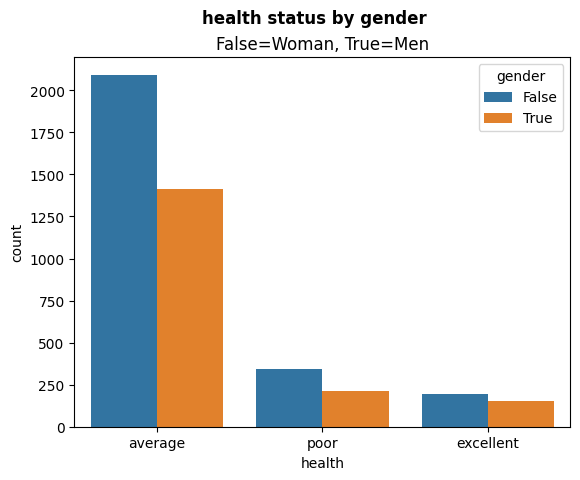

In [134]:
sns.countplot(x='health', data=session_3_data, hue='gender')
plt.suptitle('health status by gender', fontweight='bold')
plt.title('False=Woman, True=Men')
plt.show()

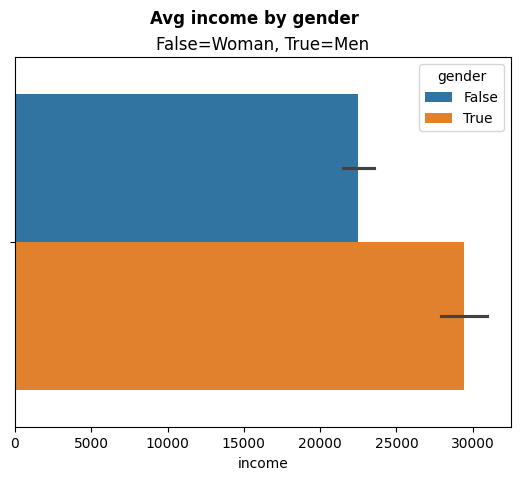

In [135]:
sns.barplot(x='income', data=session_3_data, hue='gender')
plt.suptitle('Avg income by gender', fontweight='bold')
plt.title('False=Woman, True=Men')
plt.show()

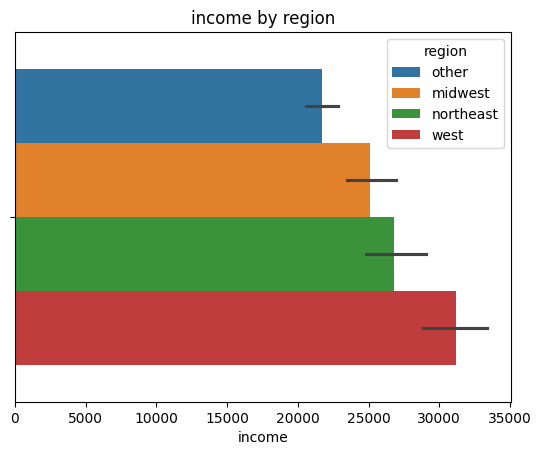

In [142]:
sns.barplot(x='income', data=session_3_data, hue='region')
plt.title('income by region')
plt.show()

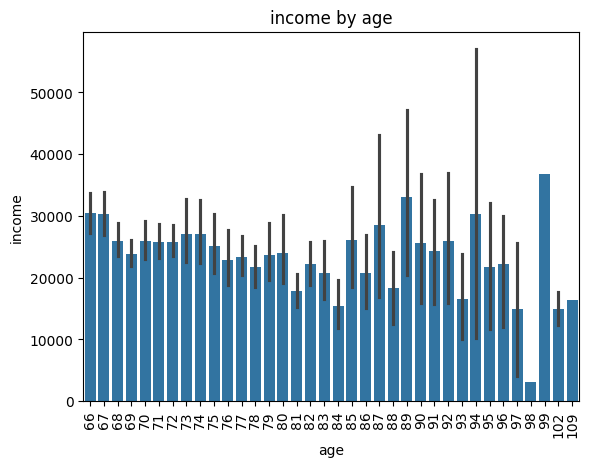

In [141]:
sns.barplot(x='age', y='income', data=session_3_data)
plt.title('income by age')
plt.xticks(rotation=90)
plt.show()

1. Age by gender looks relatively the same as what we saw in the gender percentage graph where there are plenty more women than men and this was reflective throughout all ages as it lowered as people get older. There doesnt seem to be any relation between the 2.
2. Health status looks like no relation as well, the women vs men population reflects the original, several more women are healthier than men. Poor and excellent health conditions are low compared to average.
3. Average income by gender shows a skewed income towards men in this relation. This is showing if you are a man then your income will be higher despite having the lower population. 
4. Income by region shows us the ranking of income goes west > northeast > midwest > other. This tells us, if you are in the west region youll most likely have more income than if you were in other region.
5. Income by age relation shows us people get a lot more money skewed towards old age. This helps show the older you get the higher the income.